In-depth discussion and considerations here: [Google Doc](https://docs.google.com/document/d/1yybXlpcSJoG5vBvTEmCNWursBU2-HfoUe_fQr-wj02E/edit)

## 1. Preliminary Exploration

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
#importing data
van_df = pd.read_excel('Data Specialist Spreadsheet for Task_2 tabs.xlsx', sheet_name='VAN Export')
new_df = pd.read_excel('Data Specialist Spreadsheet for Task_2 tabs.xlsx', sheet_name='NEW EMPLOYER LIST')

In [3]:
#checking null values of VAN Export 
van_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VANID     761 non-null    int64  
 1   name      761 non-null    object 
 2   email     382 non-null    object 
 3   home      386 non-null    float64
 4   cell      373 non-null    float64
 5   address   391 non-null    object 
 6   job       761 non-null    object 
 7   employer  761 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 47.7+ KB


In [4]:
#Checking null values of New Employer List
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   email       1019 non-null   object 
 1   phone       1025 non-null   float64
 2   name        2000 non-null   object 
 3   address     962 non-null    object 
 4   title       2000 non-null   object 
 5   work place  2000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 93.9+ KB


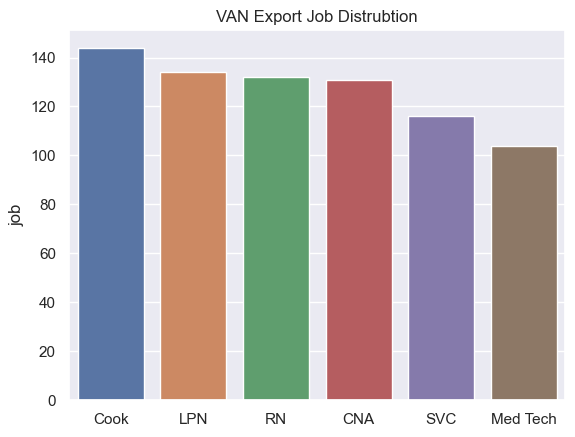

In [5]:
job_chart = sns.barplot(x=van_df['job'].value_counts().index, 
                        y=van_df['job'].value_counts()).set_title('VAN Export Job Distrubtion')

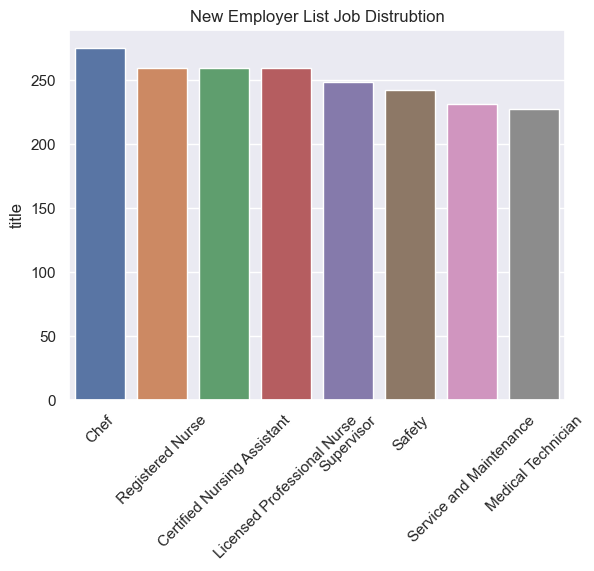

In [6]:
job_chart = sns.barplot(x=new_df['title'].value_counts().index, 
                        y=new_df['title'].value_counts()).set_title('New Employer List Job Distrubtion')

plt.xticks(rotation=45);



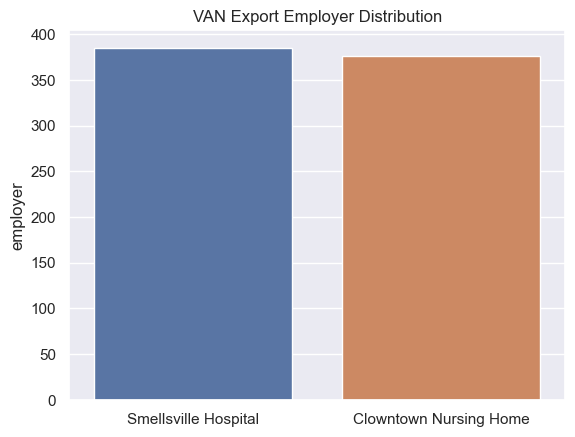

In [7]:
employer_chart = sns.barplot(x=van_df['employer'].value_counts().index, 
                        y=van_df['employer'].value_counts()).set_title('VAN Export Employer Distribution')



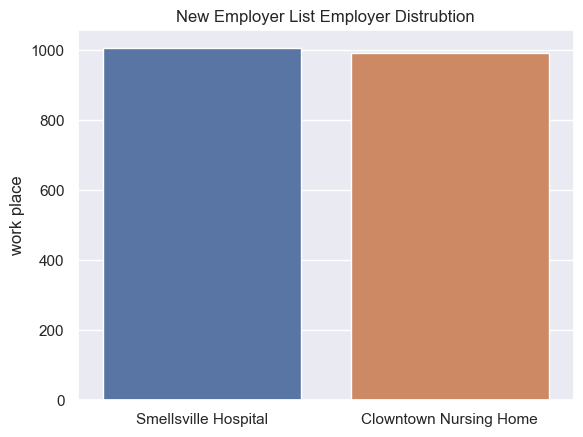

In [8]:
employer_chart = sns.barplot(x=new_df['work place'].value_counts().index, 
                        y=new_df['work place'].value_counts()).set_title('New Employer List Employer Distrubtion')



## 2. Matching / Exploring Duplicates  

In [9]:
#matching records based on name ('first initial, last name')
van_df['comp_name'] = van_df['name'].apply(lambda x: x.split(', ')[1][0] + '. ' + x.split(', ')[0])

In [10]:
#matching records based on name ('first initial, last name')
van_df['comp_name'] = van_df['name'].apply(lambda x: x.split(', ')[1][0] + '. ' + x.split(', ')[0])
merged_df = new_df.merge(van_df,how='left',left_on='name', right_on='comp_name')


In [11]:
#identifying duplicate records resulting from the same name value
#The are 2 names that have duplicates: D. Thorsby, D. Cummings
duplicate_df = merged_df[merged_df['comp_name'].notnull()]
pd.concat([duplicate_df[duplicate_df['comp_name'].duplicated(keep='first')], 
           duplicate_df[duplicate_df['comp_name'].duplicated(keep='last')]])

,email_x,phone,name_x,address_x,title,work place,VANID,name_y,email_y,home,cell,address_y,job,employer,comp_name
721,NaN,7.138907e+09,D. Thorsby,28 Golden Leaf Drive,Service and Maintenance,Clowntown Nursing Home,12459690.0,"Thorsby, Dareen",NaN,NaN,NaN,NaN,Med Tech,Smellsville Hospital,D. Thorsby
1166,NaN,NaN,D. Thorsby,70431 Village Green Way Apt 453,Medical Technician,Smellsville Hospital,12459107.0,"Thorsby, Denny",NaN,5.131568e+09,7.138907e+09,NaN,SVC,Clowntown Nursing Home,D. Thorsby
1167,NaN,NaN,D. Thorsby,70431 Village Green Way Apt 453,Medical Technician,Smellsville Hospital,12459690.0,"Thorsby, Dareen",NaN,NaN,NaN,NaN,Med Tech,Smellsville Hospital,D. Thorsby
1222,dcummingsh9@imgur.com,NaN,D. Cummings,6 Messerschmidt Place Apt 1276,Registered Nurse,Clowntown Nursing Home,12458507.0,"Cummings, Dimitri",dcummingsie@youtu.be,5.134541e+09,NaN,"791 Mayer Terrace, Cincinnati, OH 45213",RN,Clowntown Nursing Home,D. Cummings
720,NaN,7.138907e+09,D. Thorsby,28 Golden Leaf Drive,Service and Maintenance,Clowntown Nursing Home,12459107.0,"Thorsby, Denny",NaN,5.131568e+09,7.138907e+09,NaN,SVC,Clowntown Nursing Home,D. Thorsby
721,NaN,7.138907e+09,D. Thorsby,28 Golden Leaf Drive,Service and Maintenance,Clowntown Nursing Home,12459690.0,"Thorsby, Dareen",NaN,NaN,NaN,NaN,Med Tech,Smellsville Hospital,D. Thorsby
1134,dcummingsie@youtu.be,NaN,D. Cummings,791 Mayer Terrace,Registered Nurse,Clowntown Nursing Home,12458507.0,"Cummings, Dimitri",dcummingsie@youtu.be,5.134541e+09,NaN,"791 Mayer Terrace, Cincinnati, OH 45213",RN,Clowntown Nursing Home,D. Cummings
1166,NaN,NaN,D. Thorsby,70431 Village Green Way Apt 453,Medical Technician,Smellsville Hospital,12459107.0,"Thorsby, Denny",NaN,5.131568e+09,7.138907e+09,NaN,SVC,Clowntown Nursing Home,D. Thorsby


In [12]:
#No existing records of workers with job title "Safety" in VAN 
merged_df[merged_df['title'] == 'Safety']['VANID'].value_counts()

Series([], Name: VANID, dtype: int64)

In [13]:
#No existing records of workers with job title "Supervisor" in VAN
merged_df[merged_df['title']=='Supervisor']['VANID'].value_counts()

Series([], Name: VANID, dtype: int64)

In [14]:
#renaming values in 'title' to match values in 'job' for easer comparison
duplicate_df['title'].replace(to_replace={'Registered Nurse': 'RN', 'Certified Nursing Assistant': 'CNA',
                           'Service and Maintenance': 'SVC', 'Licensed Professional Nurse': 'LPN',
                           'Medical Technician': 'Med Tech', 'Chef':'Cook'},inplace=True)

/var/folders/72/ynts5c395pbg0fsz23hyhjq80000gn/T/ipykernel_92964/160560897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['title'].replace(to_replace={'Registered Nurse': 'RN', 'Certified Nursing Assistant': 'CNA',


In [15]:
#no new records in which a previously existing worker in VAN has switched to a new position
#the records below are a result of duplicates
duplicate_df[(duplicate_df['title']) != (duplicate_df['job'])]

,email_x,phone,name_x,address_x,title,work place,VANID,name_y,email_y,home,cell,address_y,job,employer,comp_name
721,NaN,7.138907e+09,D. Thorsby,28 Golden Leaf Drive,SVC,Clowntown Nursing Home,12459690.0,"Thorsby, Dareen",NaN,NaN,NaN,NaN,Med Tech,Smellsville Hospital,D. Thorsby
1166,NaN,NaN,D. Thorsby,70431 Village Green Way Apt 453,Med Tech,Smellsville Hospital,12459107.0,"Thorsby, Denny",NaN,5.131568e+09,7.138907e+09,NaN,SVC,Clowntown Nursing Home,D. Thorsby


In [16]:
#no new records in which a previously existing worker in VAN has switched to a new medical facility
#the records below are a result of duplicates
duplicate_df[(duplicate_df['work place']) != (duplicate_df['employer'])]

,email_x,phone,name_x,address_x,title,work place,VANID,name_y,email_y,home,cell,address_y,job,employer,comp_name
721,NaN,7.138907e+09,D. Thorsby,28 Golden Leaf Drive,SVC,Clowntown Nursing Home,12459690.0,"Thorsby, Dareen",NaN,NaN,NaN,NaN,Med Tech,Smellsville Hospital,D. Thorsby
1166,NaN,NaN,D. Thorsby,70431 Village Green Way Apt 453,Med Tech,Smellsville Hospital,12459107.0,"Thorsby, Denny",NaN,5.131568e+09,7.138907e+09,NaN,SVC,Clowntown Nursing Home,D. Thorsby
